In [1]:
import sys
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

from pycaret.classification import *
pycaret.__version__

AEM_database_classification = pd.read_csv(r'AEM_database_classification.csv')
mordred_descriptor = AEM_database_classification.loc[:, 'ABC_A':]

polymer_info = AEM_database_classification.loc[:, ["Cluster No.","Block A (x)", "Block B (1-x)", "Block A/B ratio","Polymer type"]]

database_classification = pd.concat([polymer_info, mordred_descriptor], axis = 1)
print(database_classification.dtypes)

Cluster No.          int64
Block A (x)        float64
Block B (1-x)      float64
Block A/B ratio    float64
Polymer type         int64
                    ...   
WPol_B               int64
Zagreb1_B            int64
Zagreb2_B            int64
mZagreb1_B         float64
mZagreb2_B         float64
Length: 2230, dtype: object


In [2]:
exp_classification = setup(data = database_classification, target = 'Cluster No.', silent = True, session_id = 6989, transformation = False, feature_selection = False, remove_multicollinearity = True, remove_perfect_collinearity = True, normalize=False, ignore_low_variance=False, use_gpu=True)

,Description,Value
0,session_id,6989
1,Target,Cluster No.
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(227, 2230)"
5,Missing Values,False
6,Numeric Features,2036
7,Categorical Features,193
8,Ordinal Features,False
9,High Cardinality Features,False


In [3]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9375,0.0000,0.9286,0.9531,0.9315,0.9256,0.9299
5,0.8750,0.0000,0.8810,0.8958,0.8708,0.8519,0.8558
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

C extension was not built during install!


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


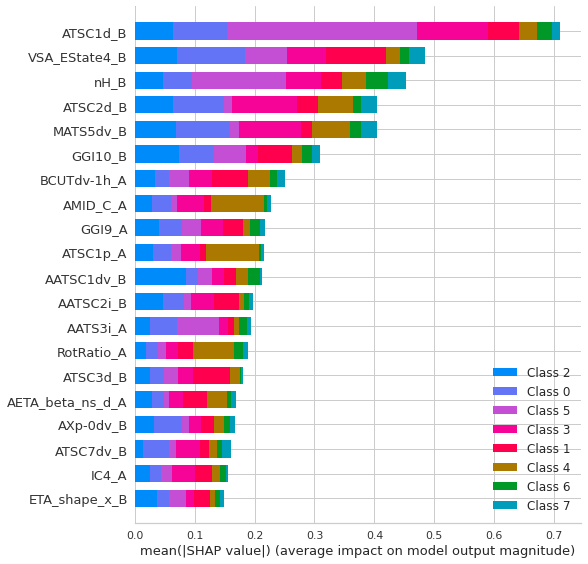

In [4]:
interpret_model(cat)